In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
os.getcwd()

'C:\\Users\\Vishaal\\Documents\\GitHub\\TREC_Distributed_Machine_Learning\\TREC\\10_Data\\20_Extracted Tweets\\20_2019 A Test'

In [4]:
os.chdir('10_Data/20_Extracted Tweets/20_2019 A Test')

In [8]:
df = pd.read_csv('Ultimate_Dataframe_TREC_2019_A-test.csv')

In [9]:
df.sample(5)

,Unnamed: 0,ID,Tweet,Event,Source,User_Language,Event_Decrption,Categories,Priority
131,131,389969029890584576,Terrible earthquake.... #prayforcebu #prayforb...,earthquakeBohol2013,"<a href=""http://instagram.com"" rel=""nofollow"">...",en,The 2013 Bohol earthquake occurred on October ...,"['Hashtags', 'OriginalEvent', 'Sentiment']",Low
354,354,390169890931232768,@mai__zamora @CrushKoSarahG @Imxianki @Laagann...,earthquakeBohol2013,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",en,The 2013 Bohol earthquake occurred on October ...,"['Hashtags', 'Sentiment']",Low
6774,6774,751241413191282688,"In Dallas, during a protest against the recent...",shootingDallas2017,"<a href=""http://twitter.com/download/iphone"" r...",en,Five officers are dead ? four Dallas police of...,"['Factoid', 'Sentiment']",Low
4424,4424,1041099850400583680,@SoonerBorn33 @PackFootball @Jake_Trotter @WVU...,hurricaneFlorence2018,"<a href=""http://twitter.com/download/android"" ...",en,Hurricane Florence was a powerful and long-liv...,['Irrelevant'],Low
3123,3123,727641793202819074,Thank you @TrishHrytsak. Let's hope everyone o...,fireYMM2016,"<a href=""http://twitter.com/download/iphone"" r...",en,"On May 1, 2016, a wildfire began southwest of ...","['Hashtags', 'OriginalEvent', 'Sentiment']",Low


In [10]:
df.dtypes

Unnamed: 0          int64
ID                  int64
Tweet              object
Event              object
Source             object
User_Language      object
Event_Decrption    object
Categories         object
Priority           object
dtype: object

In [11]:
df.shape

(8218, 9)

In [12]:
'''
    Converting cols to str data type
'''
df['Source'] = df['Source'].astype('str')
df['Event'] = df['Event'].astype('str')

In [13]:
'''
    Source (device iphone, andorid etc) and user_location have Nans
'''
df.isna().any()

Unnamed: 0         False
ID                 False
Tweet              False
Event              False
Source             False
User_Language      False
Event_Decrption    False
Categories         False
Priority           False
dtype: bool

In [14]:
s_priority = df['Priority'].apply(lambda x:x).value_counts()
s_priority

Low         7212
Medium       545
High         351
Critical     110
Name: Priority, dtype: int64

Text(0.5, 1.0, 'Count of Tweets by Priority')

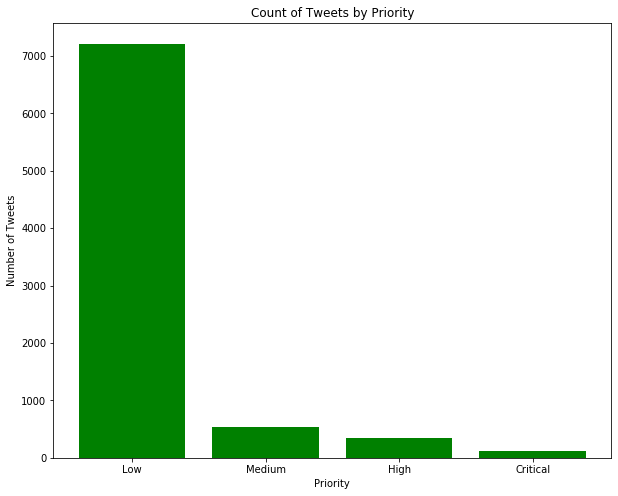

In [15]:
'''
    As predicted most tweets are of low prioity. Critical tweets are far and few. Unbalanced.
'''
plt.figure(figsize=(10,8))
plt.bar(s_priority.index, s_priority, color = 'g')
plt.xlabel('Priority')
plt.ylabel('Number of Tweets')
plt.title('Count of Tweets by Priority')

In [16]:
'''
    We try to get the count of each type of decvice used to tweet. Not sure how it will be useful yet but
    I guess good to know.
    
    By far, the webclient, iphones and androids are the most popular. It also has to be noted that we have some
    tweets from non-twitter sources like Facebook and some other random websites.
    
    Tweet Deck is dashboard application by twitter to manage multiple twitter accounts.
'''
s_twc = df['Source'].str.contains('Twitter Web Client').apply(lambda x:x).value_counts()
s_tweetdeck = df['Source'].str.contains('TweetDeck').apply(lambda x:x).value_counts()
s_tw = df['Source'].str.contains('Twitter for Websites').apply(lambda x:x).value_counts()
s_tf = df['Source'].str.contains('twitterfeed').apply(lambda x:x).value_counts()
s_iphone = df['Source'].str.contains('Twitter for iPhone').apply(lambda x:x).value_counts()
s_android = df['Source'].str.contains('Twitter for Android').apply(lambda x:x).value_counts()
s_ipad = df['Source'].str.contains('Twitter for iPad').apply(lambda x:x).value_counts()
s_bb = df['Source'].str.contains('Twitter for BlackBerry').apply(lambda x:x).value_counts()
s_f = df['Source'].str.contains('Facebook').apply(lambda x:x).value_counts()

s_tw

False    8185
True       33
Name: Source, dtype: int64

In [17]:
source_type = ['Web Client', 'iPhone', 'Android', 'Twitter Feed', 'Facebook', 'Tweet Deck','iPad', 'BlackBerry', 'Websites']
source_count = [s_twc[1], s_iphone[1], s_android[1], s_tf[1], s_f[1], s_tweetdeck[1], s_ipad[1], s_bb[1], s_tw[1]]

Text(0.5, 1.0, 'Tweets Collected by Source')

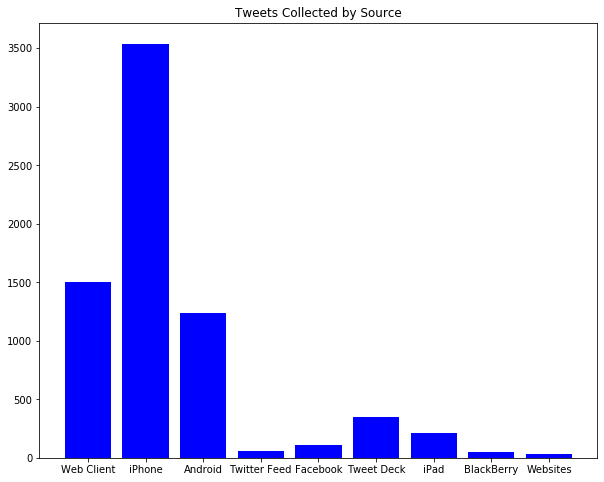

In [18]:
plt.figure(figsize=(10,8))
plt.bar(source_type, source_count, color = 'blue')
plt.title('Tweets Collected by Source')

In [19]:
'''
    We shall now look at the tweet counts by type of disaster. Attacks, bombings and school shootings are considered 
    separately despite having some commonalities in the nature of the disaster. 
    
    Most of the tweets are from earthquakes and the least are from tornadoes.
'''

event_type = ['flood', 'earthquake', 'fire', 'shooting', 'hurricane' ]
event_count = {}
for element in event_type:
    counts = df['Event'].str.contains(element).apply(lambda x:x).value_counts()
    event_count[element] = counts[1]

event_count = sorted(event_count.items(), key=lambda kv: kv[1], reverse = True)
keys = []
val = []
for element in event_count:
    keys.append(element[0])
    val.append(element[1])
    

Text(0.5, 1.0, 'Tweets Collected by Disaster Type')

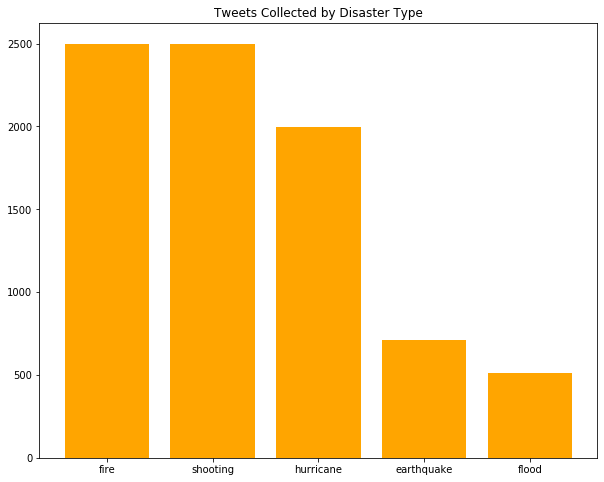

In [20]:
plt.figure(figsize=(10,8))
plt.bar(keys, val, color = 'orange')
plt.title('Tweets Collected by Disaster Type')

In [21]:
'''
    Writing each type of disaster as a new csv file for feature extraction
'''
for element in event_type:
    new_df = df[df['Event'].str.contains(element)]
    new_df.to_csv(element+'_TREC_2019_A_test.csv')

In [22]:
a = np.array(df['Tweet'][df['Priority'] == 'Critical'])
len(a)

110

In [23]:
l = {}
for element in event_type:
    df_1 = df[(df['Priority'] == 'Critical') & (df['Event'].str.contains(element))]
    l[element] = df_1.shape[0]
    
l = sorted(l.items(), key=lambda kv: kv[1], reverse = True)
key = []
values = []
for element in l:
    key.append(element[0])
    values.append(element[1])
    

Text(0.5, 1.0, 'Critical Tweets by Disaster Type - 2019 A Test')

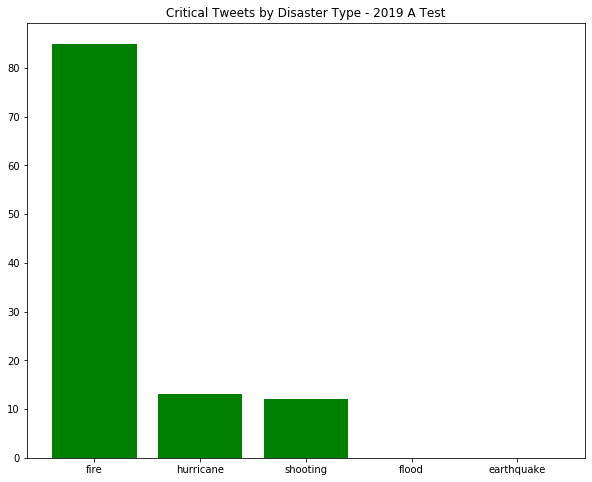

In [25]:
plt.figure(figsize=(10,8))
plt.bar(key, values, color = 'g')
plt.title('Critical Tweets by Disaster Type - 2019 A Test')

In [25]:
df['Event'].unique()

array(['earthquakeBohol2013', 'earthquakeCalifornia2014', 'fireYMM2016',
       'floodChoco2019', 'hurricaneFlorence2018', 'shootingDallas2017'],
      dtype=object)

In [34]:
df['Source'].unique()

array(['<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="http://stone.com/Twittelator" rel="nofollow">Twittelator</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://www.myplume.com/" rel="nofollow">PlumeÂ\xa0forÂ\xa0Android</a>',
       '<a href="http://twitterfeed.com" rel="nofollow">twitterfeed</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="https://dlvrit.com/" rel="nofollow">dlvr.it</a>',
       '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
       '<a href="http://www.hootsuite.com" rel="nofollow">Hootsuite</a>',
       '<a href="http://www.facebook.com/twitter" rel="nofollow">Facebook</a>',
       '<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M2)</a>',
       '<a href="http